In [1]:
from pybaseball import schedule_and_record
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import os

In [30]:
file = os.path.join("baseball.csv")
df = pd.read_csv(file, encoding="ISO-8859-1")
df

,TeamName,ABBR,HomeBase
0,Angels,LAA,Los Angeles
1,Astros,HOU,Houston
2,Athletics,OAK,Oakland
3,BlueJays,TOR,Toronto
4,Braves,ATL,Atlanta
5,Brewers,MIL,Milwaukee
6,Cardinals,STL,St. Louis
7,Cubs,CHC,Chicago
8,Diamondbacks,ARI,Arizona
9,Dodgers,LAD,Los Angeles


In [3]:
schedule_data = schedule_and_record(2017, "KCR")
schedule_data.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
1,"Monday, Apr 3",KCR,@,MIN,L,1.0,7.0,9.0,0-1,5.0,1.0,Santana,Strahm,None,2:47,D,39615.0,-1,None
2,"Wednesday, Apr 5",KCR,@,MIN,L,1.0,9.0,9.0,0-2,5.0,2.5,Santiago,Kennedy,None,3:06,D,15171.0,-2,None
3,"Thursday, Apr 6",KCR,@,MIN,L,3.0,5.0,9.0,0-3,5.0,3.0,Rogers,Minor,Kintzler,3:14,D,16078.0,-3,None
4,"Friday, Apr 7",KCR,@,HOU,W,5.0,1.0,9.0,1-3,5.0,3.0,Vargas,Fiers,None,3:12,N,30491.0,1,None
5,"Saturday, Apr 8",KCR,@,HOU,W,7.0,3.0,9.0,2-3,5.0,2.0,Duffy,Gregerson,None,2:42,N,35373.0,2,None


In [4]:
abbr_list= df['ABBR'].tolist()
len(abbr_list)

30

In [5]:
schedule_data_short = schedule_data.loc[:,["Tm", "Home_Away", "Opp","W/L", "Time"]]
schedule_data_short.head()

,Tm,Home_Away,Opp,W/L,Time
1,KCR,@,MIN,L,2:47
2,KCR,@,MIN,L,3:06
3,KCR,@,MIN,L,3:14
4,KCR,@,HOU,W,3:12
5,KCR,@,HOU,W,2:42


In [6]:
wa_df = schedule_data_short.loc[(schedule_data_short["Home_Away"] == "@")&(schedule_data_short["W/L"] == "W")].count()
la_df = schedule_data_short.loc[(schedule_data_short["Home_Away"] == "@")&(schedule_data_short["W/L"] == "L")].count()
wh_df = schedule_data_short.loc[(schedule_data_short["Home_Away"] == "Home")&(schedule_data_short["W/L"] == "W")].count()
lh_df = schedule_data_short.loc[(schedule_data_short["Home_Away"] == "Home")&(schedule_data_short["W/L"] == "L")].count()

In [7]:
wa_df

Tm           37
Home_Away    37
Opp          37
W/L          37
Time         37
dtype: int64

In [8]:
win_num_list=[]
loss_num_list = []
for x in abbr_list:
    schedule_data = schedule_and_record(2017, x)
    schedule_data_short = schedule_data.loc[:,["Tm", "Home_Away", "Opp","W/L", "Time"]]
    wh_df = schedule_data_short.loc[(schedule_data_short["Home_Away"] == "Home")&(schedule_data_short["W/L"] == "W")]
    lh_df = schedule_data_short.loc[(schedule_data_short["Home_Away"] == "Home")&(schedule_data_short["W/L"] == "L")]
    win_num = len(wh_df['Tm'])
    loss_num = len(lh_df['Tm'])
    win_num_list.append(win_num)
    loss_num_list.append(loss_num)
#    print(x)
print(win_num_list)
#    print(loss_num)
#     overview = pd.DataFrame({"Team": x,
#                          "Win": [win_num],
#                          "Loss": [loss_num]})
    

[36, 45, 35, 35, 28, 42, 40, 43, 43, 47, 29, 43, 32, 36, 32, 38, 34, 40, 31, 34, 37, 38, 35, 38, 41, 35, 29, 36, 30, 46]


In [9]:
len(win_num_list)

30

In [10]:
overview = pd.DataFrame({"Team": abbr_list,
                         "Win": win_num_list,
                         "Loss": loss_num_list})

In [11]:
overview

,Team,Win,Loss
0,LAA,36,38
1,HOU,45,33
2,OAK,35,35
3,TOR,35,39
4,ATL,28,44
5,MIL,42,38
6,STL,40,37
7,CHC,43,33
8,ARI,43,29
9,LAD,47,24


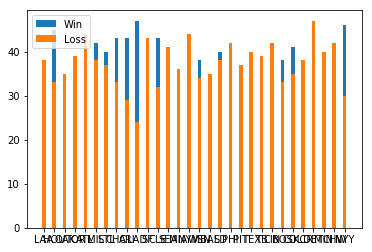

In [12]:
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(abbr_list, win_num_list, width)
p2 = plt.bar(abbr_list, loss_num_list, width)

plt.legend((p1[0], p2[0]), ('Win', 'Loss'))

plt.show()

In [13]:
import json
import requests

In [14]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

In [31]:
city_list= df['HomeBase'].tolist()

In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
lon = []

for city in city_list:
# Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    response = requests.get(query_url).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    

In [33]:
# Get the temperature from the response

[34.05,
 29.76,
 37.8,
 43.65,
 33.75,
 43.03,
 38.63,
 41.88,
 -28.39,
 34.05,
 37.78,
 41.51,
 47.6,
 21.53,
 40.73,
 38.9,
 39.29,
 32.72,
 39.95,
 40.44,
 -28.86,
 27.95,
 39.1,
 42.36,
 -22.84,
 39.08,
 42.35,
 40.66,
 41.88,
 40.73]

In [37]:
overview['lat'] = lat
overview['lon'] = lon

In [38]:
overview

,Team,Win,Loss,lat,lon
0,LAA,36,38,34.05,-118.24
1,HOU,45,33,29.76,-95.37
2,OAK,35,35,37.80,-122.27
3,TOR,35,39,43.65,-79.39
4,ATL,28,44,33.75,-84.39
5,MIL,42,38,43.03,-87.92
6,STL,40,37,38.63,-90.20
7,CHC,43,33,41.88,-87.62
8,ARI,43,29,-28.39,-49.38
9,LAD,47,24,34.05,-118.24


In [39]:
overview.to_csv('baseball_coordinates.csv')

In [45]:
overview.to_json('baseball_coordinates.json', orient='records')